In [6]:
%pylab
%matplotlib inline

from Functions import functions as f
import skimage.io as sk


Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


/Users/johannamoeller/opt/anaconda3/envs/environmentGroup4/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


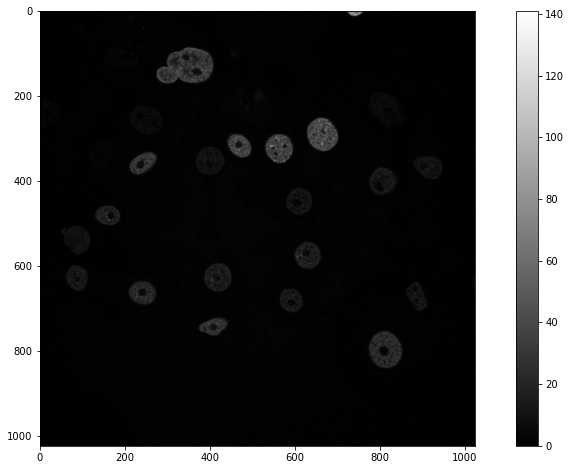

In [7]:
img = sk.imread("Data/N2DH-GOWT1/img/t01.tif") #Bild laden
f.show_image(img, 15, 8)

/Users/johannamoeller/PycharmProjects/2021-topic-04-team-04/Functions/functions.py:55: RuntimeWarning: invalid value encountered in ubyte_scalars
  neighborhood_distance.append((img[p]-img[i,j])/img[p]) # adds relative euclidean distance to list
/Users/johannamoeller/PycharmProjects/2021-topic-04-team-04/Functions/functions.py:55: RuntimeWarning: overflow encountered in ubyte_scalars
  neighborhood_distance.append((img[p]-img[i,j])/img[p]) # adds relative euclidean distance to list
/Users/johannamoeller/PycharmProjects/2021-topic-04-team-04/Functions/functions.py:55: RuntimeWarning: divide by zero encountered in ubyte_scalars
  neighborhood_distance.append((img[p]-img[i,j])/img[p]) # adds relative euclidean distance to list
/Users/johannamoeller/PycharmProjects/2021-topic-04-team-04/Functions/functions.py:69: RuntimeWarning: overflow encountered in ubyte_scalars
  neighborhood_distance.append((img[p]-img[i,j])) # adds euclidean distance to list


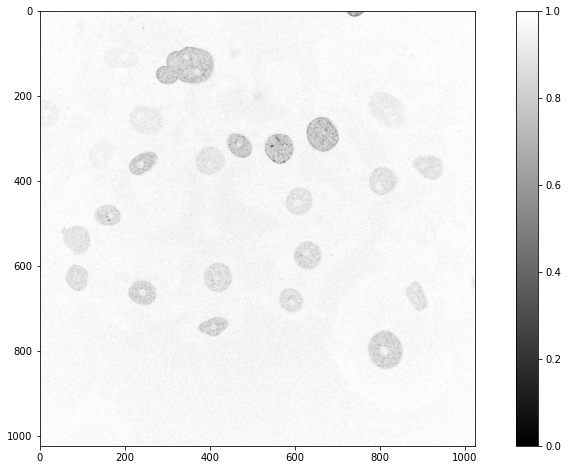

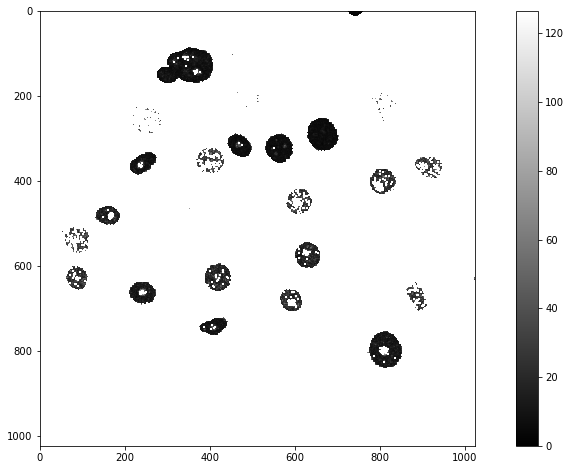

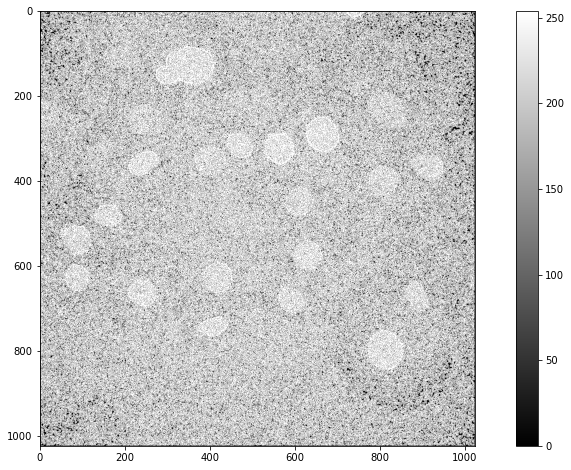

In [8]:
#calculates similarity of every pixel to its nxn neighborhood (standard deviation)
sd = f.standarddeviation(img,3) # apply method for testing
sd = sd/max(sd.flatten()) # normes standard deviation
similarity = 1-sd # calculates similarity
f.show_image(similarity, 15, 8)

#calculates relative euclidean distance of pixel to its nxn neighborhood
eurel = f.euclidean_relative(img, 3)
f.show_image(eurel, 15, 8)

#calculates relative euclidean distance of pixel to its nxn neighborhood
eu = f.euclidean_n(img, 3)
f.show_image(eu, 15, 8)

/Users/johannamoeller/PycharmProjects/2021-topic-04-team-04/Functions/functions.py:55: RuntimeWarning: invalid value encountered in ubyte_scalars
  neighborhood_distance.append((img[p]-img[i,j])/img[p]) # adds relative euclidean distance to list
/Users/johannamoeller/PycharmProjects/2021-topic-04-team-04/Functions/functions.py:55: RuntimeWarning: overflow encountered in ubyte_scalars
  neighborhood_distance.append((img[p]-img[i,j])/img[p]) # adds relative euclidean distance to list
/Users/johannamoeller/PycharmProjects/2021-topic-04-team-04/Functions/functions.py:55: RuntimeWarning: divide by zero encountered in ubyte_scalars
  neighborhood_distance.append((img[p]-img[i,j])/img[p]) # adds relative euclidean distance to list


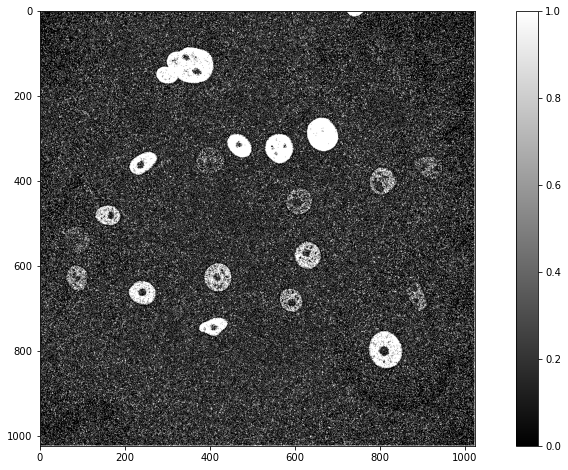

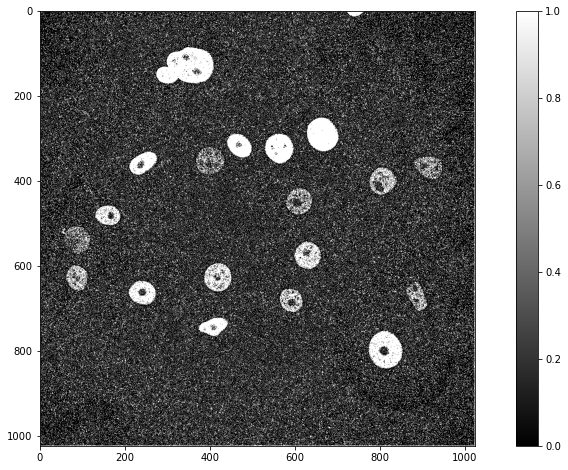

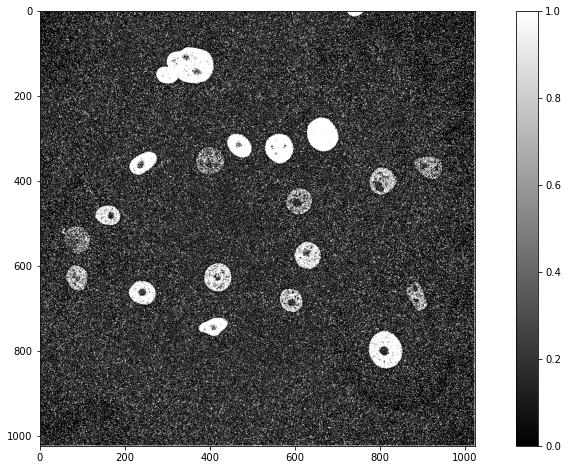

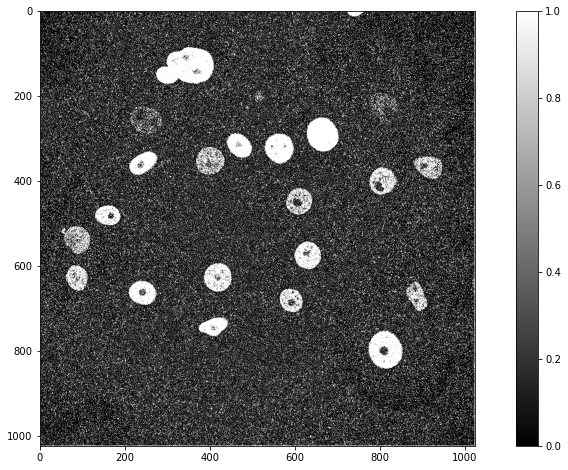

In [12]:

def seeds(img, T1, T2): # automatic seed selection algorithm
    result = numpy.zeros(img.shape)
    sd_seeds = f.standarddeviation(img,3) # standard deviation
    sd_flat = sd_seeds.flatten() # standard deviation as 1D-array
    similarity_seeds = 1 - sd_seeds/max(sd_flat) # calculates similarity of every pixel to its neighbors
    eurel_seeds = f.euclidean_relative(img, 3) # relative euclidean distance of every pixel to its neighbors
    for p in ndindex(img.shape): # border pixel value is zero
        if similarity_seeds[p] > T1 and eurel_seeds[p] < T2: # compares pixel with threshold
            result[p] = 1 # assigns value 1 to seeds
    return result



seed_final = seeds(img, 0.4, 40)
f.show_image(seed_final, 15, 8)
